## 랜덤 포레스트

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds_hmeq = pd.read_csv("실습파일/HMEQ.csv", engine="python")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace =True)

In [5]:
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
np.random.seed(seed=1234)

msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
ds_hmeq_test = ds_hmeq_dummy[~msk]

ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)

print("train data X size:{}".format(ds_hmeq_train_x.shape))
print("train data Y size:{}".format(ds_hmeq_train_y.shape))
print("test data X size:{}".format(ds_hmeq_test_x.shape))
print("test data Y size:{}".format(ds_hmeq_test_y.shape))

train data X size:(2604, 18)
train data Y size:(2604,)
test data X size:(1144, 18)
test data Y size:(1144,)


In [7]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accuracy on training set: 0.992
Accuracy on test set: 0.948


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [9]:
ds_hmeq_train_x_scaled = scale(ds_hmeq_train_x,axis = 0)
ds_hmeq_test_x_scaled = scale(ds_hmeq_test_x,axis = 0)
pd.DataFrame(ds_hmeq_train_x_scaled, columns=ds_hmeq_train_x.columns).head()

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [10]:
rf_scaled = RandomForestClassifier(random_state=1234)
rf_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(rf_scaled.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_scaled.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

Accuracy on training set: 0.992
Accuracy on test set: 0.946


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
n_iter_tree = 30

train_accuracy = []
test_accuracy = []

for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators=n_tree +1, random_state=1234)
    rf1.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf1.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(rf1.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["NumberofTree"] = [n_tree +1 for n_tree in range(n_iter_tree)]
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy

In [12]:
ds_accuracy1

,NumberofTree,TrainAccuracy,TestAccuracy
0,1,0.970430,0.926573
1,2,0.968510,0.937063
2,3,0.988479,0.941434
3,4,0.981183,0.942308
4,5,0.991167,0.942308
5,6,0.986175,0.944056
6,7,0.992704,0.947552
7,8,0.989247,0.944930
8,9,0.995008,0.944056
9,10,0.991935,0.945804


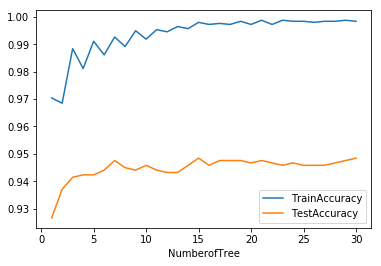

In [13]:
ds_accuracy1.set_index("NumberofTree", inplace = False).plot.line()

In [14]:
train_accuracy = []
test_accuracy = []

para_criterion = ["gini", "entropy"]

for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion=criterion, random_state=1234)
    rf2.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf2.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(rf2.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.991935,0.945804
1,entropy,0.994624,0.942308


In [15]:
train_accuracy = []
test_accuracy = []

para_max_depth = [i+1 for i in range(10)]*2
n_iter_depth = 10

para_criterion = ["gini"]*n_iter_depth + ["entropy"]*n_iter_depth

for (criterion, depth) in zip(para_criterion, para_max_depth):
    rf3 = RandomForestClassifier(criterion=criterion, max_depth=depth, random_state=1234)
    rf3.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf3.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(rf3.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))

ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/a

In [16]:
ds_accuracy3

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.908986,0.910839
1,gini,2,0.913594,0.917832
2,gini,3,0.931644,0.932692
3,gini,4,0.933948,0.930944
4,gini,5,0.937788,0.936189
5,gini,6,0.939708,0.936189
6,gini,7,0.943548,0.930070
7,gini,8,0.947005,0.929196
8,gini,9,0.947773,0.937063
9,gini,10,0.952765,0.931818


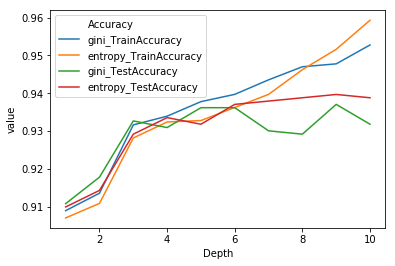

In [17]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars =["Criterion", "Depth"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=ds_accuracy3_melt)

In [18]:
train_accuracy = []
test_accuracy = []

n_depth = 4
n_iter_min_leaf_size = 10
para_criterion = ["gini"]*n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for (criterion, leafsize) in zip(para_criterion, para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion=criterion, max_depth=n_depth, min_samples_leaf=leafsize, random_state=1234)
    rf4.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf4.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(rf4.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))

ds_accuracy4 = pd.DataFrame()
ds_accuracy4["Criterion"] = para_criterion
ds_accuracy4["Depth"] = n_depth
ds_accuracy4["MinLeafSize"] = para_min_leaf_size
ds_accuracy4["TrainAccuracy"] = train_accuracy
ds_accuracy4["TestAccuracy"] = test_accuracy
ds_accuracy4

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/a

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.933948,0.930944
1,gini,4,2,0.933948,0.927448
2,gini,4,3,0.933948,0.929196
3,gini,4,4,0.932796,0.926573
4,gini,4,5,0.932796,0.932692
5,gini,4,6,0.932028,0.930070
6,gini,4,7,0.929724,0.930944
7,gini,4,8,0.929724,0.933566
8,gini,4,9,0.929724,0.930944
9,gini,4,10,0.929339,0.930070


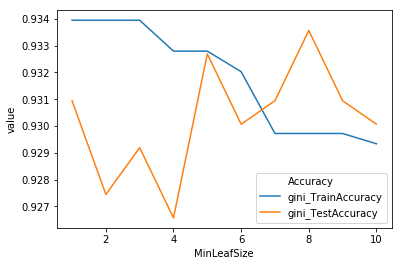

In [19]:
ds_accuracy4_melt = pd.melt(ds_accuracy4, id_vars =["Criterion", "Depth", "MinLeafSize"])
ds_accuracy4_melt["Accuracy"] = ds_accuracy4_melt["Criterion"] + "_" + ds_accuracy4_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy4_melt)

['NanumBarunGothic']


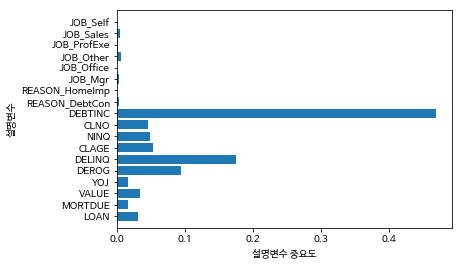

In [20]:
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로

print(plt.rcParams['font.family'])

matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게



rf_model = RandomForestClassifier(criterion="gini", max_depth=4, min_samples_leaf=10
                                  , n_estimators = 100, random_state=1234)
rf_model.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_hmeq_train_x.columns
ds_feature_importance["importance"] = rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending = False)

def plot_feature_importances(model):
    n_features = ds_hmeq_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_hmeq_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
    
plot_feature_importances(rf_model)

## 그래디언트 부스팅

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.944


In [23]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [24]:
# scale
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.943


- 스캐일링 전후 정확도는 유의미한 차이는 없는 것으로 보인다.

In [25]:
train_accuracy = []
test_accuracy = []

for lr in range(1, 100, 5):
    gb1 = GradientBoostingClassifier(learning_rate=lr/100, random_state=1234)
    gb1.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(gb1.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(gb1.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["LearningRate"] = [lr/100 for lr in range(1, 100, 5)]
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy

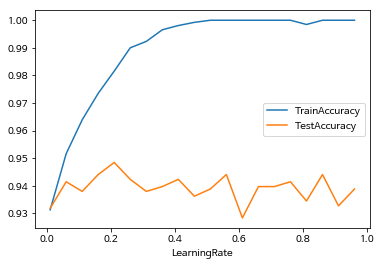

In [26]:
ds_accuracy1.round(3)
ds_accuracy1.set_index("LearningRate", inplace= False).plot.line()

In [27]:
para_estimators = [estimators for estimators in range(50, 150, 10)]
lr = 0.2

train_accuracy = []
test_accuracy = []

for estimators in para_estimators:
    gb2 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=estimators, random_state=1234)
    gb2.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(gb2.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(gb2.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Estimators"] = para_estimators
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy

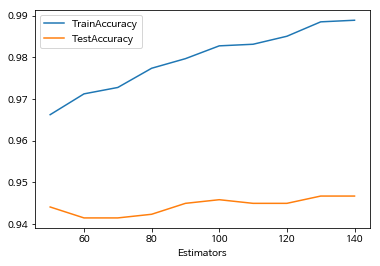

In [28]:
ds_accuracy2.round(3)
ds_accuracy2.set_index("Estimators", inplace = False).plot.line()

In [29]:
lr = 0.2 ; n_estimators = 100
para_max_depth = [i+1 for i in range(5)]

train_accuracy = []
test_accuracy = []

for depth in para_max_depth:
    gb3 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=100,max_depth=depth, random_state=1234)
    gb3.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(gb3.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(gb3.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["MaxDepth"] = para_max_depth
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy

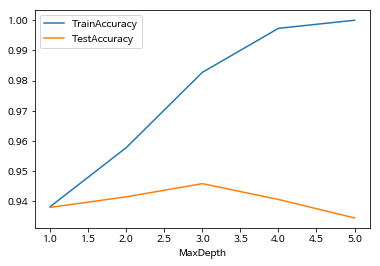

In [30]:
ds_accuracy3.round(3)
ds_accuracy3.set_index("MaxDepth", inplace = False).plot.line()

In [31]:
lr = 0.2 ; n_estimators = 100; max_depth = 3;
para_min_leaf_size = [i+1 for i in range(10)]

train_accuracy = []
test_accuracy = []

for leafsize in para_min_leaf_size:
    gb4 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=100,max_depth=3,min_samples_leaf=leafsize,
                                     random_state=1234)
    gb4.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(gb4.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(gb4.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
ds_accuracy4 = pd.DataFrame()
ds_accuracy4["MinLeafSize"] = para_min_leaf_size
ds_accuracy4["TrainAccuracy"] = train_accuracy
ds_accuracy4["TestAccuracy"] = test_accuracy

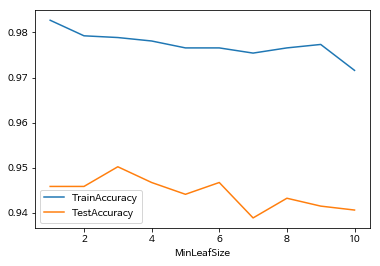

In [32]:
ds_accuracy4.round(3)
ds_accuracy4.set_index("MinLeafSize", inplace = False).plot.line()

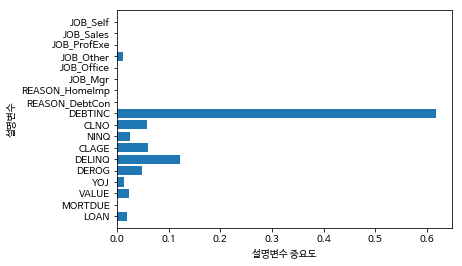

In [33]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=30,
                                     n_estimators= 5, random_state = 1234)
gb_model.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_hmeq_train_x.columns
ds_feature_importance["importance"] = gb_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending = False)

def plot_feature_importances(model):
    n_features = ds_hmeq_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_hmeq_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
    
plot_feature_importances(gb_model)